<a href="https://colab.research.google.com/github/Rey1380/NLP-in-sentiment-analysis/blob/main/ML_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='purple'>**NLP Project**</font>

<div class="alert alert-block alert-warning">
<b>
Amirkabir University of Technology<br>
Fall 2023<br>
Course: Machine Learning<br>
Instructor: Dr. Seyedin<br>
<b><font color='cyan'>Author:</font></b><br>
<b><font color='cyan'>Name: Reyhaneh Farahmand - Zahra Latifi<br />
Student Number: 9823068 - 9923069</div>

# <font color='purple'>**Importing Required Packages**</font>

In [1]:
# Required installations
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.3 MB/s eta 0:00:00


In [2]:
# Import required libraries
import re
import nltk
import string
import random
import numpy as np
import contractions
import pandas as pd
nltk.download('punkt')
nltk.download("stopwords")
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# <font color='purple'>**Loading the dataset**</font>

In [3]:
# Load the dataset
data = pd.read_csv('/content/twitter_training2.csv')

# Count the number of samples in each class
class_counts = data['label'].value_counts()
# Print the class counts
print(f"The number of samples in each class:\n{class_counts}")

# Show first 5 rows of dataset
data.head()

The number of samples in each class:
0    894
1    534
2    342
Name: label, dtype: int64


,Unnamed: 0,Unnamed: 1,label,Tweet Content
0,2401,Borderlands,0,im getting on borderlands and i will murder yo...
1,2401,Borderlands,0,I am coming to the borders and I will kill you...
2,2401,Borderlands,0,im getting on borderlands and i will kill you ...
3,2401,Borderlands,0,im coming on borderlands and i will murder you...
4,2401,Borderlands,0,im getting on borderlands 2 and i will murder ...


# <font color='purple'>**Preprocessing Data**</font>



In [4]:
# A function to clean text
def clean_text(text):

    # Lowercasing the data
    text = text.lower()

    # Remove @mentions
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Replace repetitions of punctuation
    text = re.sub(r'([!?.]){2,}', r'\1', text)

#     # Remove emojis (Our dataset doesn't have any emojis,
                                            # so it doesn't need this command)
#     text = demoji.replace(text, '')

    # Remove emoticons
    emoticons = r'[:;=][oO\-]?[D\)\]\(\]/\\OpP]'
    text = re.sub(emoticons, '', text)

    # Expand contractions (example: "I'll --> I will")
    text = contractions.fix(text)

    return text

In [5]:
# Data preprocessing

# Check for missing data (NaN)
data.dropna(subset=['Tweet Content', 'label'], inplace=True)

# Delete duplicate rows
data.drop_duplicates(subset=['Tweet Content'], inplace=True)

# Apply cleaning function which have been defined before
data['Tweet Content'] = data['Tweet Content'].apply(clean_text)

# Tokenization of datasets
data['Tweet Content'] = data['Tweet Content'].apply(nltk.word_tokenize)

# Stopword
stop_words = set(stopwords.words('english'))
data['Tweet Content'] = data['Tweet Content'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Stemming
stemmer = PorterStemmer()
data['Tweet Content'] = data['Tweet Content'].apply(lambda x: [stemmer.stem(word) for word in x])

# Join words together again
data['Tweet Content'] = data['Tweet Content'].apply(lambda x: ' '.join(x))

# <font color='purple'>**Feature Extraction (TF-IDF)**</font>


In [6]:
# TF-IDF method
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(data['Tweet Content'])

# <font color='purple'>**Fine-tuning & Evaluation with TF-IDF method**</font>


In [7]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, data['label'], test_size=0.2, random_state = random.seed(random.randint(1, 100)))

Best parameters:  {'C': 10, 'gamma': 0.1}
TF-IDF test accuracy (Non-Linear SVM): 0.9615384615384616
TF-IDF train accuracy (Non-Linear SVM): 0.9859050445103857

SVM Confusion Matrix:
[[161   0   1]
 [  7 102   0]
 [  5   0  62]]




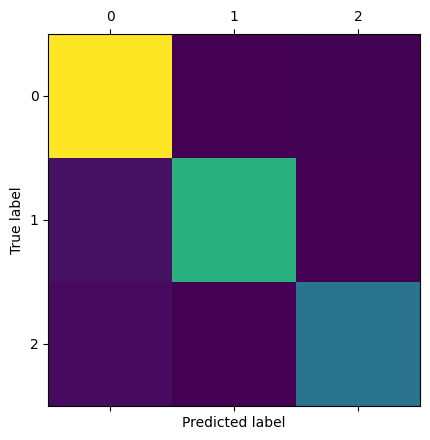

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       162
           1       1.00      0.94      0.97       109
           2       0.98      0.93      0.95        67

    accuracy                           0.96       338
   macro avg       0.97      0.95      0.96       338
weighted avg       0.96      0.96      0.96       338



In [8]:
# Non-Linear SVM

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}
# Create the SVM model
svm_model = SVC(kernel='rbf')
# Create the GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5)
# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Use the best model to make predictions on the test data
svm_preds = grid_search.best_estimator_.predict(X_test)

# Evaluate the performance of the classifier on the test set
svm_accuracy = accuracy_score(y_test, svm_preds)
accuracy_train = grid_search.score(X_train, y_train)
print('TF-IDF test accuracy (Non-Linear SVM):', svm_accuracy)
print('TF-IDF train accuracy (Non-Linear SVM):', accuracy_train)

# Compute & plot Confusion Matrix for each model
svm_cm = confusion_matrix(y_test, svm_preds)
print("\nSVM Confusion Matrix:")
print(svm_cm)
print("\n")
plt.matshow(svm_cm)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# Get classification report
print( classification_report(y_test, svm_preds))

Best parameters:  {'alpha': 0.1}
TF-IDF test accuracy (NB): 0.9644970414201184
TF-IDF train accuracy (NB): 0.983679525222552

Naive Bayes Confusion Matrix:
[[162   0   0]
 [  7 102   0]
 [  5   0  62]]




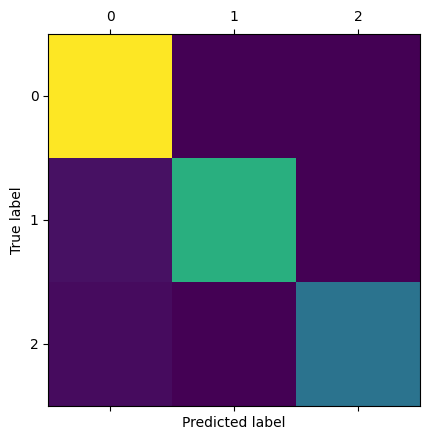

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       162
           1       1.00      0.94      0.97       109
           2       1.00      0.93      0.96        67

    accuracy                           0.96       338
   macro avg       0.98      0.95      0.96       338
weighted avg       0.97      0.96      0.96       338



In [9]:
# Naive Bayes

# Define the hyperparameter grid
param_grid = {'alpha': [0.1, 1, 10]}

# Create the NB model
nb_model = MultinomialNB()

# Create the GridSearchCV
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Use the best model to make predictions on the test data
nb_preds = grid_search.best_estimator_.predict(X_test)

# Evaluate the performance of the classifier on the test set
nb_accuracy = accuracy_score(y_test, nb_preds)
accuracy_train = grid_search.score(X_train, y_train)
print('TF-IDF test accuracy (NB):', nb_accuracy)
print('TF-IDF train accuracy (NB):', accuracy_train)

# Compute & plot Confusion Matrix for each model
nb_cm = confusion_matrix(y_test, nb_preds)
print("\nNaive Bayes Confusion Matrix:")
print(nb_cm)
print("\n")
plt.matshow(nb_cm)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# Get classification report
print( classification_report(y_test, nb_preds))

TF-IDF test accuracy (LR): 0.9378698224852071
TF-IDF train accuracy (LR): 0.9799703264094956

Logistic Regression Confusion Matrix:
[[161   0   1]
 [ 14  95   0]
 [  5   1  61]]




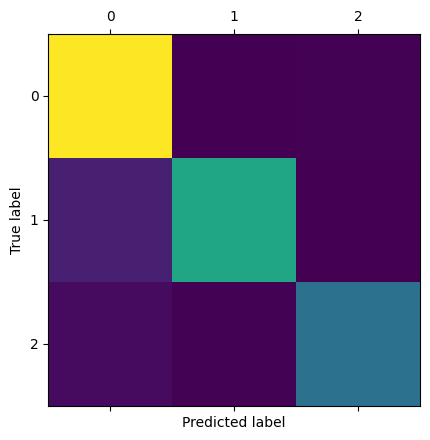

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       162
           1       0.99      0.87      0.93       109
           2       0.98      0.91      0.95        67

    accuracy                           0.94       338
   macro avg       0.96      0.93      0.94       338
weighted avg       0.94      0.94      0.94       338



In [10]:
# Logistic Regression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Evaluate the performance of the classifier on the test set
lr_accuracy = accuracy_score(y_test, lr_preds)
accuracy_train = lr_model.score(X_train, y_train)
print('TF-IDF test accuracy (LR):', lr_accuracy)
print('TF-IDF train accuracy (LR):', accuracy_train)

# Compute & plot Confusion Matrix for each model
lr_cm = confusion_matrix(y_test, lr_preds)
print("\nLogistic Regression Confusion Matrix:")
print(lr_cm)
print("\n")
plt.matshow(lr_cm)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# Get classification report
print( classification_report(y_test, lr_preds))

# <font color='purple'>**Feature Extraction (BOW)**</font>


In [11]:
# BOW method

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Tweet Content'], data['label'], test_size=0.2, random_state=random.seed(random.randint(1, 100)))

# Convert the text into a bag of words representation
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# <font color='purple'>**Fine-tuning & Evaluation with BOW method**</font>


Best parameters:  {'C': 10, 'gamma': 0.1}
BOW test accuracy (Non-Linear SVM): 0.9585798816568047
BOW train accuracy (Non-Linear SVM): 0.9881305637982196

SVM Confusion Matrix:
[[163   0   0]
 [  9  97   0]
 [  5   0  64]]




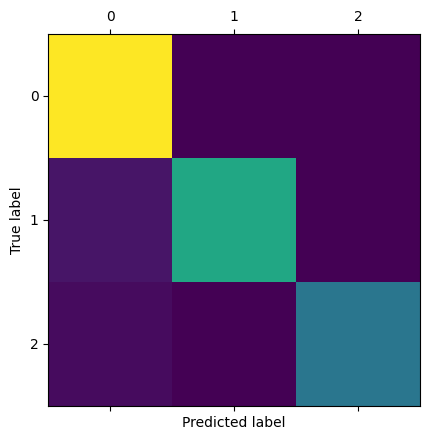

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       163
           1       1.00      0.92      0.96       106
           2       1.00      0.93      0.96        69

    accuracy                           0.96       338
   macro avg       0.97      0.95      0.96       338
weighted avg       0.96      0.96      0.96       338



In [12]:
# Non-Linear SVM

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}
# Create the SVM model
svm_model = SVC(kernel='rbf')
# Create the GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5)
# Fit the grid search on the training data
grid_search.fit(X_train_bow, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Use the best model to make predictions on the test data
svm_preds = grid_search.best_estimator_.predict(X_test_bow)

# Evaluate the performance of the classifier on the test set
svm_accuracy = accuracy_score(y_test, svm_preds)
accuracy_train = grid_search.score(X_train_bow, y_train)
print('BOW test accuracy (Non-Linear SVM):', svm_accuracy)
print('BOW train accuracy (Non-Linear SVM):', accuracy_train)

# Compute & plot Confusion Matrix for each model
svm_cm = confusion_matrix(y_test, svm_preds)
print("\nSVM Confusion Matrix:")
print(svm_cm)
print("\n")
plt.matshow(svm_cm)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# Get classification report
print( classification_report(y_test, svm_preds))

Best parameters:  {'alpha': 0.1}
BOW test accuracy (NB): 0.9408284023668639
BOW train accuracy (NB): 0.978486646884273

Naive Bayes Confusion Matrix:
[[158   4   1]
 [  9  97   0]
 [  5   1  63]]




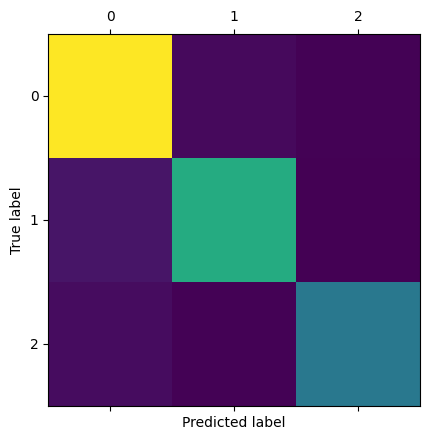

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       163
           1       0.95      0.92      0.93       106
           2       0.98      0.91      0.95        69

    accuracy                           0.94       338
   macro avg       0.95      0.93      0.94       338
weighted avg       0.94      0.94      0.94       338



In [13]:
# Naive Bayes

# Define the hyperparameter grid
param_grid = {'alpha': [0.1, 1, 10]}

# Create the NB model
nb_model = MultinomialNB()

# Create the GridSearchCV
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search on the training data
grid_search.fit(X_train_bow, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Use the best model to make predictions on the test data
nb_preds = grid_search.best_estimator_.predict(X_test_bow)

# Evaluate the performance of the classifier on the test set
nb_accuracy = accuracy_score(y_test, nb_preds)
accuracy_train = grid_search.score(X_train_bow, y_train)
print('BOW test accuracy (NB):', nb_accuracy)
print('BOW train accuracy (NB):', accuracy_train)

# Compute & plot Confusion Matrix for each model
nb_cm = confusion_matrix(y_test, nb_preds)
print("\nNaive Bayes Confusion Matrix:")
print(nb_cm)
print("\n")
plt.matshow(nb_cm)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# Get classification report
print( classification_report(y_test, nb_preds))

TF-IDF test accuracy (LR): 0.9526627218934911
TF-IDF train accuracy (LR): 0.9851632047477745

Logistic Regression Confusion Matrix:
[[162   0   1]
 [ 10  96   0]
 [  5   0  64]]




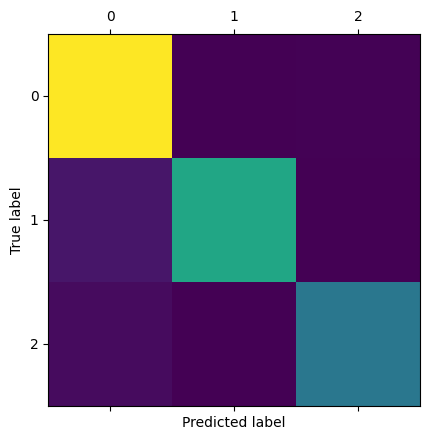

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       163
           1       1.00      0.91      0.95       106
           2       0.98      0.93      0.96        69

    accuracy                           0.95       338
   macro avg       0.97      0.94      0.95       338
weighted avg       0.96      0.95      0.95       338



In [14]:
# Logistic Regression

lr_model = LogisticRegression(max_iter = 10000)
lr_model.fit(X_train_bow, y_train)
lr_preds = lr_model.predict(X_test_bow)

# Evaluate the performance of the classifier on the test set
lr_accuracy = accuracy_score(y_test, lr_preds)
accuracy_train = lr_model.score(X_train_bow, y_train)
print('TF-IDF test accuracy (LR):', lr_accuracy)
print('TF-IDF train accuracy (LR):', accuracy_train)

# Compute & plot Confusion Matrix for each model
lr_cm = confusion_matrix(y_test, lr_preds)
print("\nLogistic Regression Confusion Matrix:")
print(lr_cm)
print("\n")
plt.matshow(lr_cm)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# Get classification report
print( classification_report(y_test, lr_preds))

# <font color='purple'>**Pre-trained BERT-Based-Uncased**</font>


In [15]:
# import extra required libraries
import torch
from transformers import BertTokenizer, BertModel

# Feature extraction using BERT

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize text data
tokenized_data = data['Tweet Content'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

# Pad tokenized sequences
max_len = max(map(len, tokenized_data))
padded_data = np.array([i + [0]*(max_len-len(i)) for i in tokenized_data.values])

# Convert to tensors
input_ids = torch.tensor(padded_data)

# Load pre-trained BERT model
model = BertModel.from_pretrained('bert-base-uncased')

# Use pre-trained BERT model to get embeddings
with torch.no_grad():
    model.eval()
    embeddings = model(input_ids)[0][:,0,:].numpy()  # Using the [CLS] token embedding for each sequence

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


SVM Accuracy with BERT: 0.7988165680473372

SVM Confusion Matrix:
[[153  18   3]
 [ 20  74   5]
 [ 16   6  43]]




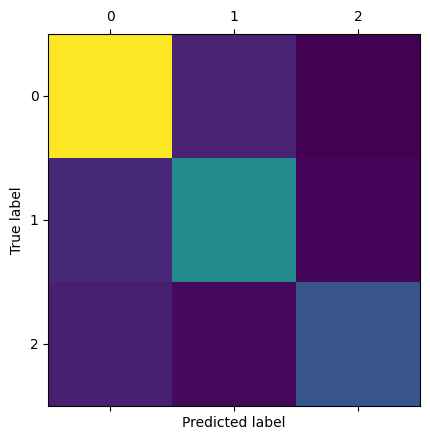

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       174
           1       0.76      0.75      0.75        99
           2       0.84      0.66      0.74        65

    accuracy                           0.80       338
   macro avg       0.80      0.76      0.78       338
weighted avg       0.80      0.80      0.80       338



In [16]:
# Model selection with BERT embeddings

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, data['label'], test_size=0.2, random_state=random.seed(random.randint(1, 100)))


# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_cm = confusion_matrix(y_test, svm_preds)

print("SVM Accuracy with BERT:", svm_accuracy)
print("\nSVM Confusion Matrix:")
print(svm_cm)
print("\n")
plt.matshow(svm_cm)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# Get classification report
print( classification_report(y_test, svm_preds))

Naive Bayes Accuracy: 0.47633136094674555

Naive Bayes Confusion Matrix:
[[113  60   1]
 [ 53  42   4]
 [ 36  23   6]]




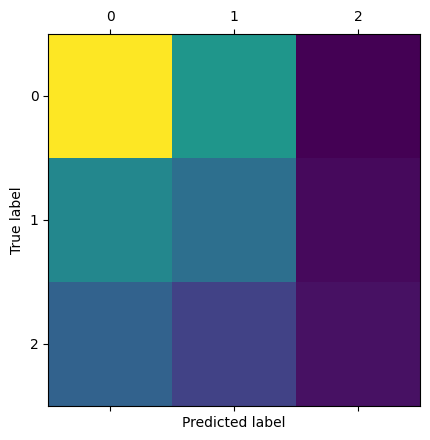

              precision    recall  f1-score   support

           0       0.56      0.65      0.60       174
           1       0.34      0.42      0.38        99
           2       0.55      0.09      0.16        65

    accuracy                           0.48       338
   macro avg       0.48      0.39      0.38       338
weighted avg       0.49      0.48      0.45       338



In [17]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler class
scaler = MinMaxScaler()

# Scale the input data to non-negative values
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_scaled, y_train)
nb_preds = nb_model.predict(X_test_scaled)
nb_accuracy = accuracy_score(y_test, nb_preds)
nb_cm = confusion_matrix(y_test, nb_preds)

print("Naive Bayes Accuracy:", nb_accuracy)
print("\nNaive Bayes Confusion Matrix:")
print(nb_cm)
print("\n")
plt.matshow(nb_cm)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# Get classification report
print( classification_report(y_test, nb_preds))

Logistic Regression Accuracy: 0.7544378698224852

Logistic Regression Confusion Matrix:
[[151  18   5]
 [ 25  69   5]
 [ 20  10  35]]




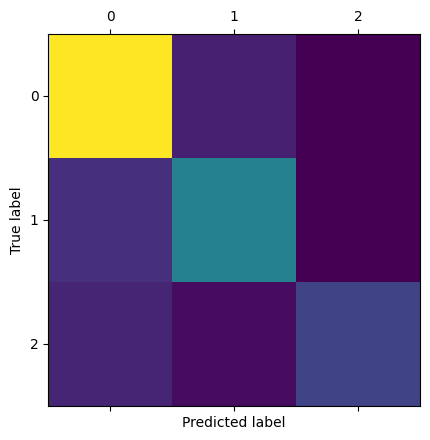

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       174
           1       0.71      0.70      0.70        99
           2       0.78      0.54      0.64        65

    accuracy                           0.75       338
   macro avg       0.75      0.70      0.72       338
weighted avg       0.75      0.75      0.75       338



In [18]:
# Logistic Regression
lr_model = LogisticRegression(max_iter = 10000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_cm = confusion_matrix(y_test, lr_preds)

print("Logistic Regression Accuracy:", lr_accuracy)
print("\nLogistic Regression Confusion Matrix:")
print(lr_cm)
print("\n")
plt.matshow(lr_cm)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# Get classification report
print( classification_report(y_test, lr_preds))